<a href="https://colab.research.google.com/github/Isenlith/ANASIN-II/blob/master/DFT_inversa_e_outras_coisas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
from matplotlib import pyplot as plt

plt.rcParams["figure.figsize"] = [12, 4]

##Inversa da DFT

In [0]:
def idft(sinal_dft):
  N = len(sinal_dft)
  Wn = np.exp(-2j*np.pi/N)                   # Kernel da Transformada
  sinal = np.zeros(N, dtype='complex')       # Preciso definir explicitamente que é de números complexos, caso contrário serão ignorados
  
  for k in range(0, N):
    for n in range(0, N):
      sinal[k] += sinal_dft[n] * Wn**(-k*n)
      
  return sinal/N

In [0]:
x = [0, 1, 2, 3]
x_fft = np.fft.fft(x)
x_idft = idft(x_fft)
print(x_idft)

[0.+0.00000000e+00j 1.+1.11022302e-16j 2.-1.66533454e-16j
 3.-4.99600361e-16j]


##DFT retangular

In [0]:
def dftr(sinal):
  N = len(sinal)
  n = np.arange(0, N)
  k = np.arange(0, N)[np.newaxis]               # np.newaxis é necessário para criar um novo eixo e poder transpor o vetor k
  k = k.T                                       # Transposta do vetor k
  Wn = np.exp(-2j*np.pi/N)
  sinal_dft = np.zeros(N, dtype = 'complex')    # Preciso definir explicitamente que é de números complexos, caso contrário serão ignorados
  
  matrix = sinal * Wn**(k*n)                    # Montando a matriz retangular  
  for i in range(0, N):
    sinal_dft[i] = matrix[i].sum()              # Somando as colunas
  
  return sinal_dft

In [0]:
x = [0, 1, 2, 3]
x_dftr = dftr(x)
print(x_dftr)

print()

x = [6, 4, 9, 0, 1, 5, 2, 7]
x_dftr = dftr(x)
print(x_dftr)

[ 6.+0.00000000e+00j -2.+2.00000000e+00j -2.-7.34788079e-16j
 -2.-2.00000000e+00j]

[34.        +0.00000000e+00j  9.24264069-1.34314575e+00j
 -4.        -2.00000000e+00j  0.75735931+1.26568542e+01j
  2.        -1.95399252e-14j  0.75735931-1.26568542e+01j
 -4.        +2.00000000e+00j  9.24264069+1.34314575e+00j]


##Frequência de Análise

Teorema de Amostragem de Nyquist \\
$Fs = 2F_{max}$

Resolução de frequência = $\frac{Fs}{N}$

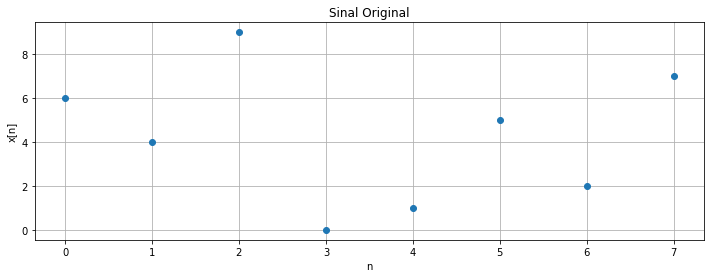

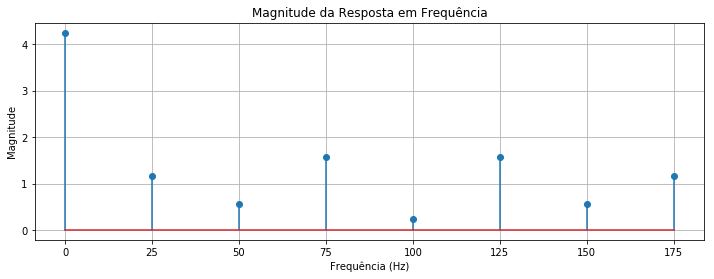

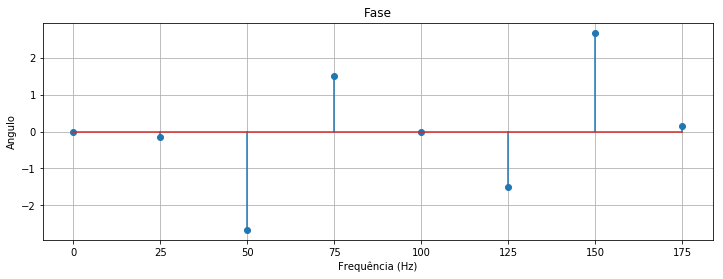

In [0]:
x = np.array([6, 4, 9, 0, 1, 5, 2, 7])
N = len(x)
fs = 200

x_fft = np.fft.fft(x)
m = np.arange(0, N)

plt.figure(1)
plt.plot(x, 'o')
plt.title('Sinal Original')
plt.xlabel('n')
plt.ylabel('x[n]')
plt.grid()

plt.figure(2)
res = m*fs/N
plt.stem(res, np.abs(x_fft)/N)
plt.title('Magnitude da Resposta em Frequência')
plt.xlabel('Frequência (Hz)')
plt.ylabel('Magnitude')
plt.grid()

plt.figure(3)
res = m*fs/N
plt.stem(res, np.angle(x_fft))
plt.title('Fase')
plt.xlabel('Frequência (Hz)')
plt.ylabel('Angulo')
plt.grid()

plt.show()

##Densidade Espectral de Potência

A densidade espectral mede a intensidade de $f(x)$ no intervalo de frequência entre $\omega + \Delta \omega$ (com $\Delta \omega$ pequeno e fixo)


$\frac{1}{N} \sum_{k=0}^{N-1} |X[k]|^2$ \\
$\frac{1}{N} \sum_{k=0}^{N-1} |C_k|^2 N$ \\
em que $|C_k|^2$ correspondem as contribuições dadas por CADA frequência a energia total

A função de $\textbf{densidade espectral de potência (PSD)}$ mostra a intensidade das oscilações em função da frequência.

Em outras palavras, $\textbf{mostra em quais frequências as oscilações são fortes e quais as frequências que as oscilações são fracas}$.

##Teorema do Parseval

A interpretação desta forma do teorema é que a energia total do sinal contido na forma de onda $x[n]$ somada ao longo do tempo total t é igual ao total da energia da forma de onda da transformada de Fourier $X[k]$ somada através de todas as suas componentes de frequência f.

In [0]:
x = np.array([-2, -1, 0, 1, 2, 3, 4])
x_fft = np.fft.fft(x)
N = len(x)

E_x = (np.abs(x)**2).sum()
E_xfft = (1/N) * (np.abs(x_fft)**2).sum()

if E_x == E_xfft:
  print('Teorema válido')
else:
  print('Teorema inválido')

Teorema válido


##Periodograma

<function matplotlib.pyplot.show>

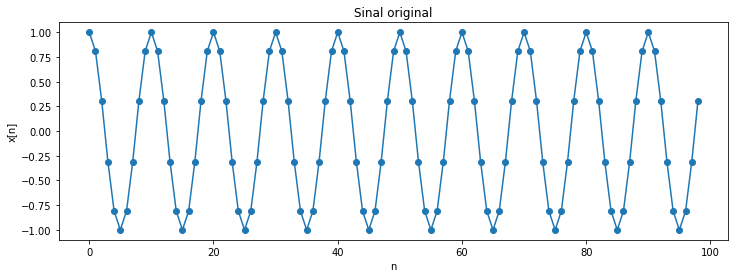

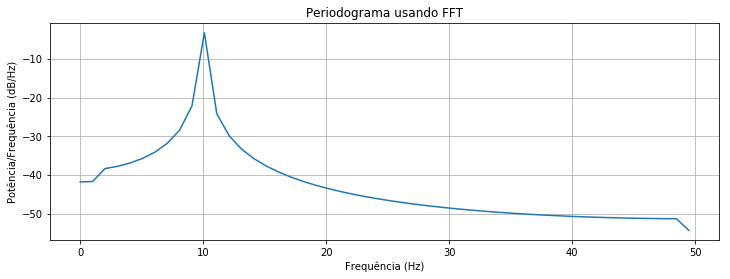

In [0]:
fs = 100
t = np.arange(0, 1-1/fs, 1/fs)
x = np.cos(2*np.pi*10*t)
N = len(x)

plt.figure(1)
plt.plot(x, 'o-')
plt.title('Sinal original')
plt.xlabel('n')
plt.ylabel('x[n]')

x_fft = np.fft.fft(x)                    # Notei que a fft do octave resulta em valores diferentes, por isso o periodograma fica diferente do da Viviane
x_fft = x_fft[:N//2+1]
psdx = (1/(fs*N)) * (np.abs(x_fft))**2
psdx[2:-1] = 2*psdx[2:-1]
freq = np.arange(0, fs/2, fs/N)

plt.figure(2)
plt.plot(freq, 10*np.log10(psdx))
plt.grid()
plt.title('Periodograma usando FFT')
plt.xlabel('Frequência (Hz)')
plt.ylabel('Potência/Frequência (dB/Hz)')

plt.show